## IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

##  IMPORTING DATASET 

In [2]:
data = pd.read_csv("C:\\Users\\skbho\\Downloads\\breast-cancer-wisconsin (3).csv")
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
list(data)

['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5', '2.1']

### NAMING COLUMNS OF THE DATASET 

In [4]:
data.rename(columns={'1000025':'Sample code number ', '5':'Clump Thickness', '1':'Uniformity of Cell Size', '1.1':'Uniformity of Cell Shape', '1.2':'Marginal Adhesion', '2':'Single Epithelial Cell Size', '1.3':'Bare Nuclei', '3':'Bland Chromatin', '1.4':'Normal Nucleoli', '1.5':'Mitoses', '2.1':'Class:'},inplace=True)
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


### The mean, variance, standard deviation of all the columns

In [5]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
data.var()

Sample code number             3.813461e+11
Clump Thickness                7.939283e+00
Uniformity of Cell Size        9.318216e+00
Uniformity of Cell Shape       8.837936e+00
Marginal Adhesion              8.160197e+00
Single Epithelial Cell Size    4.908034e+00
Bland Chromatin                5.953875e+00
Normal Nucleoli                9.333050e+00
Mitoses                        2.945213e+00
Class:                         9.055346e-01
dtype: float64

In [7]:
data['Bare Nuclei']

0      10
1       2
2       4
3       1
4      10
       ..
693     2
694     1
695     3
696     4
697     5
Name: Bare Nuclei, Length: 698, dtype: object

In [8]:
#converting the data type of the bare nuclei column to int, peviously it was obj
data['Bare Nuclei']=pd.to_numeric(data['Bare Nuclei'],errors='coerce')

In [9]:
#replacing all the ? with NaN values
data.replace('?',np.NaN)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4


In [10]:
#mean of the bare nuclei column
mean_new=data['Bare Nuclei'].mean()
mean_new

3.5483870967741935

In [11]:
data.replace('NaN',data['Bare Nuclei'].mean())

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4


array([[<AxesSubplot:title={'center':'Sample code number '}>,
        <AxesSubplot:title={'center':'Clump Thickness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>],
       [<AxesSubplot:title={'center':'Uniformity of Cell Shape'}>,
        <AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>],
       [<AxesSubplot:title={'center':'Bare Nuclei'}>,
        <AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>],
       [<AxesSubplot:title={'center':'Mitoses'}>,
        <AxesSubplot:title={'center':'Class:'}>, <AxesSubplot:>]],
      dtype=object)

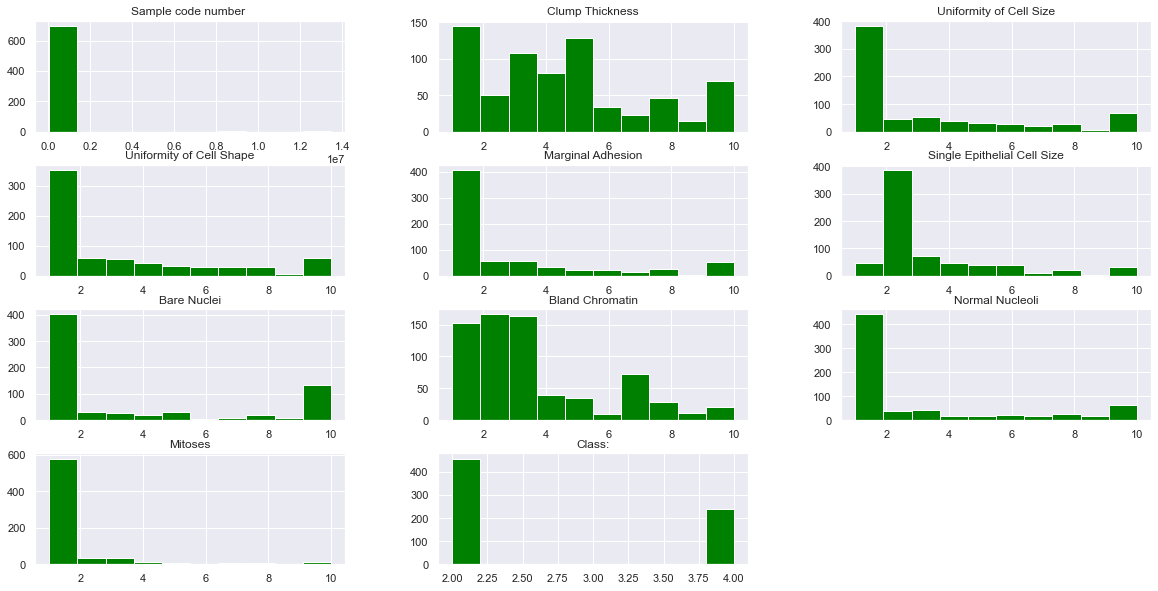

In [12]:
#plotting the histogram of all the columns
data.hist(figsize=(20,10),bins=10,color='green')


## PHASE-2 

In [13]:
#getting any 2 random values and storing them
import random
randomlist=[]
for i in range(0,2):
    n=random.randint(1,len(data))
    randomlist.append(n)



In [14]:
#getting the row data of the random values
u2=[]
u4=[]
for i in data.iloc[randomlist[0]][1: -1]:
    u2.append(i)

for i in data.iloc[randomlist[1]][1: -1]:
    u4.append(i)
    


In [15]:
#calculating euclidean distance
distance1 = []
distance2 = []

for i in range(0,len(data)):
    count = 0
    sumd1 = 0
    sumd2 = 0
    for j in data.iloc[i][1:-1]:
        sumd1 += pow((j-u2[count]),2)
        sumd2 += pow((j-u4[count]),2)
        count+=1
    distance1.append(np.sqrt(sumd1))
    distance2.append(np.sqrt(sumd2))

### FINAL MEAN 

In [16]:
distance1

[12.569805089976535,
 2.449489742783178,
 13.038404810405298,
 3.7416573867739413,
 21.236760581595302,
 9.055385138137417,
 1.7320508075688772,
 4.242640687119285,
 3.1622776601683795,
 1.4142135623730951,
 1.0,
 6.708203932499369,
 2.23606797749979,
 17.46424919657298,
 10.14889156509222,
 3.0,
 3.1622776601683795,
 16.3707055437449,
 5.0990195135927845,
 15.459624833740307,
 16.583123951777,
 2.0,
 nan,
 1.0,
 9.591663046625438,
 2.449489742783178,
 4.0,
 1.0,
 2.23606797749979,
 2.23606797749979,
 1.4142135623730951,
 15.716233645501712,
 1.7320508075688772,
 2.23606797749979,
 1.0,
 20.199009876724155,
 7.211102550927978,
 14.594519519326424,
 10.862780491200215,
 nan,
 11.489125293076057,
 18.384776310850235,
 12.12435565298214,
 20.12461179749811,
 1.0,
 14.352700094407323,
 0.0,
 3.7416573867739413,
 15.033296378372908,
 12.206555615733702,
 7.211102550927978,
 14.628738838327793,
 16.583123951777,
 15.748015748023622,
 13.45362404707371,
 17.378147196982766,
 9.746794344808963

In [17]:
distance2

[12.083045973594572,
 1.4142135623730951,
 12.409673645990857,
 2.449489742783178,
 20.663978319771825,
 9.273618495495704,
 1.7320508075688772,
 4.242640687119285,
 1.4142135623730951,
 2.449489742783178,
 1.0,
 5.744562646538029,
 3.0,
 16.76305461424021,
 9.1104335791443,
 1.0,
 1.4142135623730951,
 15.362291495737216,
 3.1622776601683795,
 14.798648586948742,
 15.588457268119896,
 0.0,
 nan,
 2.23606797749979,
 8.94427190999916,
 1.4142135623730951,
 2.0,
 1.0,
 3.0,
 1.0,
 1.4142135623730951,
 14.66287829861518,
 1.7320508075688772,
 1.0,
 1.0,
 19.390719429665317,
 6.0,
 14.177446878757825,
 10.862780491200215,
 nan,
 10.0,
 17.944358444926362,
 11.61895003862225,
 19.313207915827967,
 2.23606797749979,
 14.212670403551895,
 2.0,
 2.449489742783178,
 14.352700094407323,
 11.0,
 6.324555320336759,
 13.490737563232042,
 16.217274740226856,
 14.696938456699069,
 12.206555615733702,
 16.673332000533065,
 8.426149773176359,
 10.723805294763608,
 8.888194417315589,
 11.40175425099138,


#### ASSIGNMENT OF CLUSTER , i.e.  based upon the distance the datapoints are divided into 2 clusters, i.e. that of "2" or"4"

In [18]:
Cluster=[]
for i in range(len(data)):
    if distance1[i]>distance2[i] :
     Cluster.append(4)
    else:
      Cluster.append(2)
data["Cluster"]=Cluster

#### Here we have 2 columns the predicted cluster using euclidean distance and the given class of the datapoint. So by using the formulas we calculated the errors.

In [19]:
pred_2=data["Cluster"].value_counts()[2]
pred_2

205

In [20]:
pred_4=data["Cluster"].value_counts()[4]
pred_4

493

In [21]:
actual_2=data["Class:"].value_counts()[2]
actual_2

457

In [22]:
actual_4=data["Class:"].value_counts()[4]
actual_4

241

# Result

In [23]:
errorB=(462-457)/436
errorM=(436-241)/262
total_error_rate=(41+41)/698
print(errorB)
print(errorM)
print(total_error_rate)

0.011467889908256881
0.7442748091603053
0.1174785100286533


### METHOD2: 

In [24]:
data['Bare Nuclei'].replace("?", np.nan, inplace=True)
data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)
mean_value = round(data['Bare Nuclei'].mean(skipna=True), 4)
data = data.fillna(mean_value)
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']])


In [25]:
for i in range(len(y_predicted)):
    if y_predicted[i] == 0:
        y_predicted[i] = 2
    else:
        y_predicted[i] = 4
        
result = pd.DataFrame()
result['Class:'] = data['Class:']
result['Predicted Class'] = y_predicted

        
result.head(20)

,Class:,Predicted Class
0,2,4
1,2,2
2,2,4
3,2,2
4,4,4
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


In [26]:
km.cluster_centers_

array([[3.04301075, 1.30322581, 1.44731183, 1.34408602, 2.08817204,
        1.38092301, 2.10322581, 1.26236559, 1.10967742],
       [7.15879828, 6.79828326, 6.72961373, 5.73390558, 5.472103  ,
        7.87401373, 6.10300429, 6.07725322, 2.54935622]])